# Ejercicios de prueba para gráficas y tablas

### Este archivo tiene como objetivo documentar y hacer las pruebas de las tablas para identificar si funcionan los códigos antes de pasarlos al tablero de streamlit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_reactivos = pd.read_excel("C:/Users/Usuario/Documents/OCI/2024/Tablero/Tabla de respuestas OCI.xlsx")
df_resultados = pd.read_excel("C:/Users/Usuario/Documents/OCI/2024/Tablero/Tabla de resultados_con vacios.xlsx")
df_directorio = pd.read_excel("C:/Users/Usuario/Documents/OCI/2024/Tablero/Directorio_CSEP.xlsx")


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
df_resultados

,CCT,Folio,Grupo,APELLIDO PATERNO,APELLIDO MATERNO,NOMBRE(S),P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,09DPR0011U,1,A,PATERNO 1,MATERNO 1,NOMBRE 1,a,b,c,a,a,a,b,c,d,d
1,09DPR0011U,2,A,PATERNO 2,MATERNO 2,NOMBRE 2,b,b,c,d,a,c,d,a,c,b
2,09DPR0011U,3,A,PATERNO 3,MATERNO 3,NOMBRE 3,a,c,c,NaN,a,b,a,b,c,d
3,09DPR0011U,4,A,PATERNO 4,MATERNO 4,NOMBRE 4,b,b,a,b,b,c,d,NaN,b,c
4,09DPR3198I,5,A,PATERNO 5,MATERNO 5,NOMBRE 5,c,c,a,d,b,d,c,b,a,d
5,09DPR3198I,6,A,PATERNO 6,MATERNO 6,NOMBRE 6,d,d,NaN,a,c,d,b,a,d,b
6,09DPR3198I,7,A,PATERNO 7,MATERNO 7,NOMBRE 7,a,d,b,d,a,c,b,c,a,c
7,09PPR0407I,8,B,PATERNO 8,MATERNO 8,NOMBRE 8,b,a,c,c,NaN,a,a,c,a,b
8,09PPR0407I,9,B,PATERNO 9,MATERNO 9,NOMBRE 9,d,d,d,a,b,c,d,b,a,c
9,09PPR0407I,10,B,PATERNO 10,MATERNO 10,NOMBRE 10,c,a,b,d,c,b,a,b,d,c


#### Proceso para obtener al ganador

In [4]:
# Crear un DataFrame vacío para almacenar los resultados
df_calificado = pd.DataFrame(columns=["CCT","Nombre Escuela","Turno","Sostenimiento","DEP","Zona Escolar","Alcaldía",'Alumno', 'P1', 'P2', 'P3','P4','P5','P6','P7','P8','P9','P10'])

# Iterar sobre cada fila del DataFrame de respuestas
for index, row in df_resultados.iterrows():
    # Combina las columnas de nombre del alumno en una sola columna 'Alumno'
    alumno = f"{row['APELLIDO PATERNO']} {row['APELLIDO MATERNO']} {row['NOMBRE(S)']}"
    cct = row["CCT"]

# Obtener información de la escuela utilizando merge
    fila_escuela = df_directorio[df_directorio['CCT'] == cct]

# Crear un diccionario para almacenar los resultados de cada pregunta
    resultado_preguntas = {'CCT': cct,
                            'Nombre Escuela': fila_escuela['ESCUELA'].iloc[0] if not fila_escuela.empty else '',
                            'Turno':fila_escuela['NOM TUR'].iloc[0] if not fila_escuela.empty else '',
                            'Sostenimiento': fila_escuela['SOSTENIMIENTO'].iloc[0] if not fila_escuela.empty else '',
                            'DEP':fila_escuela['DEP'].iloc[0] if not fila_escuela.empty else '',
                            'Zona Escolar':fila_escuela['ZONA'].iloc[0] if not fila_escuela.empty else '',
                            'Alcaldía': fila_escuela['ALCALDIA'].iloc[0] if not fila_escuela.empty else '',
                            'Alumno': alumno}
    
    # Iterar sobre cada pregunta y comparar la respuesta del alumno con la respuesta correcta
    for pregunta in df_reactivos['Reactivo']:
        respuesta_alumno = row[pregunta]
        respuesta_correcta = df_reactivos.loc[df_reactivos['Reactivo'] == pregunta, 'Respuesta correcta'].values[0]
        
        # Asignar 1 si coincide, 0 si no coincide, y NaN si la respuesta del alumno es NaN
        if pd.isna(respuesta_alumno):
            resultado_preguntas[pregunta] = np.nan
        else:
            resultado_preguntas[pregunta] = 1 if respuesta_alumno == respuesta_correcta else 0
    
    # Agregar el diccionario al DataFrame de resultados
    df_calificado = pd.concat([df_calificado, pd.DataFrame([resultado_preguntas])], ignore_index=True)

# Mostrar el DataFrame resultante
print(df_calificado)

           CCT                   Nombre Escuela        Turno Sostenimiento  \
0   09DPR0011U  PROFR. CARITINO MALDONADO PÉREZ   VESPERTINO       PÚBLICO   
1   09DPR0011U  PROFR. CARITINO MALDONADO PÉREZ   VESPERTINO       PÚBLICO   
2   09DPR0011U  PROFR. CARITINO MALDONADO PÉREZ   VESPERTINO       PÚBLICO   
3   09DPR0011U  PROFR. CARITINO MALDONADO PÉREZ   VESPERTINO       PÚBLICO   
4   09DPR3198I        FLAVIO GUTIERREZ ZACARIAS     MATUTINO       PÚBLICO   
5   09DPR3198I        FLAVIO GUTIERREZ ZACARIAS     MATUTINO       PÚBLICO   
6   09DPR3198I        FLAVIO GUTIERREZ ZACARIAS     MATUTINO       PÚBLICO   
7   09PPR0407I                         COLUMBIA     MATUTINO       PRIVADO   
8   09PPR0407I                         COLUMBIA     MATUTINO       PRIVADO   
9   09PPR0407I                         COLUMBIA     MATUTINO       PRIVADO   
10  09DPR0123Y              PROFR. RAMON DURAND  J. AMPLIADA       PÚBLICO   
11  09DPR0123Y              PROFR. RAMON DURAND  J. AMPLIADA    

In [5]:
df_calificado["Total Aciertos"] = df_calificado.iloc[:, 8:19].sum(axis=1)
df_calificado["Aciertos Lenguaje"] = df_calificado.iloc[:, 8:12].sum(axis=1)
df_calificado["Aciertos Saberes y P. Científico"] = df_calificado.iloc[:, 12:16].sum(axis=1)
df_calificado["Aciertos Ética, Nat. y Sociedad"] = df_calificado.iloc[:, 16:18].sum(axis=1)
df_calificado

,CCT,Nombre Escuela,Turno,Sostenimiento,DEP,Zona Escolar,Alcaldía,Alumno,P1,P2,...,P5,P6,P7,P8,P9,P10,Total Aciertos,Aciertos Lenguaje,Aciertos Saberes y P. Científico,"Aciertos Ética, Nat. y Sociedad"
0,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 1 MATERNO 1 NOMBRE 1,1,1,...,0,0,1,0,0,0,4,3,1,0
1,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 2 MATERNO 2 NOMBRE 2,0,1,...,0,1,0,0,0,0,4,3,1,0
2,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 3 MATERNO 3 NOMBRE 3,1,0,...,0,0,0,0,0,0,2,2,0,0
3,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 4 MATERNO 4 NOMBRE 4,0,1,...,0,1,0,NaN,1,0,3,1,1,1
4,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 5 MATERNO 5 NOMBRE 5,0,0,...,0,0,0,0,0,0,1,1,0,0
5,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 6 MATERNO 6 NOMBRE 6,0,0,...,1,0,1,0,0,0,2,0,2,0
6,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 7 MATERNO 7 NOMBRE 7,1,0,...,0,1,1,0,0,0,4,2,2,0
7,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 8 MATERNO 8 NOMBRE 8,0,0,...,NaN,0,0,0,0,0,1,1,0,0
8,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 9 MATERNO 9 NOMBRE 9,0,0,...,0,1,0,0,0,0,1,0,1,0
9,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 10 MATERNO 10 NOMBRE 10,0,0,...,1,0,0,0,0,0,2,1,1,0


In [6]:
df_calificado_publico = df_calificado[df_calificado["Sostenimiento"] == "PÚBLICO"]
df_calificado_privado = df_calificado[df_calificado["Sostenimiento"] == "PRIVADO"]

In [7]:
df_calificado_privado

,CCT,Nombre Escuela,Turno,Sostenimiento,DEP,Zona Escolar,Alcaldía,Alumno,P1,P2,...,P5,P6,P7,P8,P9,P10,Total Aciertos,Aciertos Lenguaje,Aciertos Saberes y P. Científico,"Aciertos Ética, Nat. y Sociedad"
7,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 8 MATERNO 8 NOMBRE 8,0,0,...,NaN,0,0,0,0,0,1,1,0,0
8,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 9 MATERNO 9 NOMBRE 9,0,0,...,0,1,0,0,0,0,1,0,1,0
9,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 10 MATERNO 10 NOMBRE 10,0,0,...,1,0,0,0,0,0,2,1,1,0


In [8]:
# Convertir la columna "Total Aciertos" a tipo numérico tanto de público como privado
df_calificado_publico=df_calificado_publico.copy()
df_calificado_publico["Total Aciertos"] = pd.to_numeric(df_calificado_publico["Total Aciertos"], errors='coerce')
df_calificado_privado=df_calificado_privado.copy()
df_calificado_privado["Total Aciertos"] = pd.to_numeric(df_calificado_privado["Total Aciertos"], errors='coerce')


# Encontrar el índice del alumno con el mayor número de aciertos
indice_max_aciertos_publico = df_calificado_publico["Total Aciertos"].idxmax()
indice_max_aciertos_privado = df_calificado_privado["Total Aciertos"].idxmax()

# Obtener el número máximo de aciertos
max_aciertos_publico = df_calificado_publico.loc[indice_max_aciertos_publico, "Total Aciertos"]
max_aciertos_privado = df_calificado_privado.loc[indice_max_aciertos_privado, "Total Aciertos"]

# Obtener los nombres de los alumnos con el máximo número de aciertos
alumnos_max_aciertos_publico = df_calificado_publico[df_calificado_publico["Total Aciertos"] == max_aciertos_publico]["Alumno"].tolist()
alumnos_max_aciertos_privado = df_calificado_privado[df_calificado_privado["Total Aciertos"] == max_aciertos_privado]["Alumno"].tolist()

In [9]:
info_alumno_publico = df_calificado_publico.loc[indice_max_aciertos_publico, ["CCT", "Nombre Escuela", "Turno"]]
info_alumno_publico

CCT                        09DPR0123Y
Nombre Escuela    PROFR. RAMON DURAND
Turno                     J. AMPLIADA
Name: 10, dtype: object

In [10]:
info_alumno_publico = df_calificado_publico.loc[indice_max_aciertos_publico, ["CCT", "Nombre Escuela", "Turno"]]

# Imprimir mensaje condicional para escuelas públicas
if len(alumnos_max_aciertos_publico) == 1:
    print(f"El alumno con el mayor número de aciertos de escuelas públicas es \n{alumnos_max_aciertos_publico[0]} con {max_aciertos_publico} aciertos.")
    print(f"CCT: {info_alumno_publico['CCT']} \nEscuela: {info_alumno_publico['Nombre Escuela']} \nTurno: {info_alumno_publico['Turno']}")
else:
    print("Hay un empate entre los siguientes alumnos de escuelas públicas:")
    for i, alumno_publico in enumerate(alumnos_max_aciertos_publico):
        cct_publico = info_alumno_publico['CCT'].split(',')[i].strip() if i < len(info_alumno_publico['CCT'].split(',')) else info_alumno_publico['CCT']
        nombre_escuela_publico = info_alumno_publico['Nombre Escuela'].split(',')[i].strip() if i < len(info_alumno_publico['Nombre Escuela'].split(',')) else info_alumno_publico['Nombre Escuela']
        turno_publico = info_alumno_publico['Turno'].split(',')[i].strip() if i < len(info_alumno_publico['Turno'].split(',')) else info_alumno_publico['Turno']
        print(f"{i + 1}. {alumno_publico} con {max_aciertos_publico} aciertos.")
        print(f"CCT: {cct_publico}, \nEscuela: {nombre_escuela_publico}, \nTurno: {turno_publico}")
        
# Obtener información adicional para el alumno con el mayor número de aciertos en escuelas privadas
info_alumno_privado = df_calificado_privado.loc[indice_max_aciertos_privado, ["CCT", "Nombre Escuela", "Turno"]]

# Imprimir mensaje condicional para escuelas privadas
if len(alumnos_max_aciertos_privado) == 1:
    print(f"El alumno con el mayor número de aciertos de escuelas privadas es {alumnos_max_aciertos_privado[0]} con {max_aciertos_privado} aciertos.")
    print(f"CCT: {info_alumno_privado['CCT']}, \nEscuela: {info_alumno_privado['Nombre Escuela']}, \nTurno: {info_alumno_privado['Turno']}")
else:
    print("Hay un empate entre los siguientes alumnos de escuelas privadas:")
    for i, alumno_privado in enumerate(alumnos_max_aciertos_privado):
        cct_privado = info_alumno_privado['CCT'].split(',')[i].strip() if i < len(info_alumno_privado['CCT'].split(',')) else info_alumno_privado['CCT']
        nombre_escuela_privado = info_alumno_privado['Nombre Escuela'].split(',')[i].strip() if i < len(info_alumno_privado['Nombre Escuela'].split(',')) else info_alumno_privado['Nombre Escuela']
        turno_privado = info_alumno_privado['Turno'].split(',')[i].strip() if i < len(info_alumno_privado['Turno'].split(',')) else info_alumno_privado['Turno']
        print(f"{i + 1}. {alumno_privado} con {max_aciertos_privado} aciertos.")
        print(f"CCT: {cct_privado} \nEscuela: {nombre_escuela_privado} \nTurno: {turno_privado}")

Hay un empate entre los siguientes alumnos de escuelas públicas:
1. PATERNO 11 MATERNO 11 NOMBRE 11 con 5 aciertos.
CCT: 09DPR0123Y, 
Escuela: PROFR. RAMON DURAND, 
Turno: J. AMPLIADA
2. PATERNO 12 MATERNO 12 NOMBRE 12 con 5 aciertos.
CCT: 09DPR0123Y, 
Escuela: PROFR. RAMON DURAND, 
Turno: J. AMPLIADA
El alumno con el mayor número de aciertos de escuelas privadas es PATERNO 10 MATERNO 10 NOMBRE 10 con 2 aciertos.
CCT: 09PPR0407I, 
Escuela: COLUMBIA, 
Turno: MATUTINO


In [11]:
df_calif_ord_publico = df_calificado_publico.sort_values(by=["Total Aciertos","Aciertos Lenguaje","Aciertos Saberes y P. Científico","Aciertos Ética, Nat. y Sociedad"], ascending=False)
df_calif_ord_publico

,CCT,Nombre Escuela,Turno,Sostenimiento,DEP,Zona Escolar,Alcaldía,Alumno,P1,P2,...,P5,P6,P7,P8,P9,P10,Total Aciertos,Aciertos Lenguaje,Aciertos Saberes y P. Científico,"Aciertos Ética, Nat. y Sociedad"
10,09DPR0123Y,PROFR. RAMON DURAND,J. AMPLIADA,PÚBLICO,3,320,COYOACÁN,PATERNO 11 MATERNO 11 NOMBRE 11,1,1,...,1,0,0,1,0,0,5,3,2,0
11,09DPR0123Y,PROFR. RAMON DURAND,J. AMPLIADA,PÚBLICO,3,320,COYOACÁN,PATERNO 12 MATERNO 12 NOMBRE 12,0,0,...,0,0,0,1,1,1,5,2,1,2
0,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 1 MATERNO 1 NOMBRE 1,1,1,...,0,0,1,0,0,0,4,3,1,0
1,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 2 MATERNO 2 NOMBRE 2,0,1,...,0,1,0,0,0,0,4,3,1,0
6,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 7 MATERNO 7 NOMBRE 7,1,0,...,0,1,1,0,0,0,4,2,2,0
3,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 4 MATERNO 4 NOMBRE 4,0,1,...,0,1,0,NaN,1,0,3,1,1,1
2,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 3 MATERNO 3 NOMBRE 3,1,0,...,0,0,0,0,0,0,2,2,0,0
13,09DPR0123Y,PROFR. RAMON DURAND,J. AMPLIADA,PÚBLICO,3,320,COYOACÁN,PATERNO 14 MATERNO 14 NOMBRE 14,0,0,...,0,0,0,1,0,0,2,1,1,0
5,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 6 MATERNO 6 NOMBRE 6,0,0,...,1,0,1,0,0,0,2,0,2,0
4,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 5 MATERNO 5 NOMBRE 5,0,0,...,0,0,0,0,0,0,1,1,0,0


In [12]:
#Prueba para ordenar el DF calificado
df_calif_ord_privado = df_calificado_privado.sort_values(by=["Total Aciertos","Aciertos Lenguaje","Aciertos Saberes y P. Científico","Aciertos Ética, Nat. y Sociedad"], ascending=False)
df_calif_ord_privado

,CCT,Nombre Escuela,Turno,Sostenimiento,DEP,Zona Escolar,Alcaldía,Alumno,P1,P2,...,P5,P6,P7,P8,P9,P10,Total Aciertos,Aciertos Lenguaje,Aciertos Saberes y P. Científico,"Aciertos Ética, Nat. y Sociedad"
9,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 10 MATERNO 10 NOMBRE 10,0,0,...,1,0,0,0,0,0,2,1,1,0
7,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 8 MATERNO 8 NOMBRE 8,0,0,...,NaN,0,0,0,0,0,1,1,0,0
8,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 9 MATERNO 9 NOMBRE 9,0,0,...,0,1,0,0,0,0,1,0,1,0


In [13]:
#Prueba para dejar del DF filtrado por tipo de escuela los mejores, en caso de empate
total_reg_privado = df_calif_ord_privado[df_calif_ord_privado["Total Aciertos"] == df_calif_ord_privado["Total Aciertos"].max()].shape[0]
df_calif_ord_privado[:total_reg_privado].drop(columns=["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10"])

,CCT,Nombre Escuela,Turno,Sostenimiento,DEP,Zona Escolar,Alcaldía,Alumno,Total Aciertos,Aciertos Lenguaje,Aciertos Saberes y P. Científico,"Aciertos Ética, Nat. y Sociedad"
9,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 10 MATERNO 10 NOMBRE 10,2,1,1,0


In [14]:
df_calif_ord_publico = df_calificado_publico.sort_values(by=["Total Aciertos","Aciertos Lenguaje","Aciertos Saberes y P. Científico","Aciertos Ética, Nat. y Sociedad"], ascending=False)
df_calif_ord_publico

,CCT,Nombre Escuela,Turno,Sostenimiento,DEP,Zona Escolar,Alcaldía,Alumno,P1,P2,...,P5,P6,P7,P8,P9,P10,Total Aciertos,Aciertos Lenguaje,Aciertos Saberes y P. Científico,"Aciertos Ética, Nat. y Sociedad"
10,09DPR0123Y,PROFR. RAMON DURAND,J. AMPLIADA,PÚBLICO,3,320,COYOACÁN,PATERNO 11 MATERNO 11 NOMBRE 11,1,1,...,1,0,0,1,0,0,5,3,2,0
11,09DPR0123Y,PROFR. RAMON DURAND,J. AMPLIADA,PÚBLICO,3,320,COYOACÁN,PATERNO 12 MATERNO 12 NOMBRE 12,0,0,...,0,0,0,1,1,1,5,2,1,2
0,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 1 MATERNO 1 NOMBRE 1,1,1,...,0,0,1,0,0,0,4,3,1,0
1,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 2 MATERNO 2 NOMBRE 2,0,1,...,0,1,0,0,0,0,4,3,1,0
6,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 7 MATERNO 7 NOMBRE 7,1,0,...,0,1,1,0,0,0,4,2,2,0
3,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 4 MATERNO 4 NOMBRE 4,0,1,...,0,1,0,NaN,1,0,3,1,1,1
2,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 3 MATERNO 3 NOMBRE 3,1,0,...,0,0,0,0,0,0,2,2,0,0
13,09DPR0123Y,PROFR. RAMON DURAND,J. AMPLIADA,PÚBLICO,3,320,COYOACÁN,PATERNO 14 MATERNO 14 NOMBRE 14,0,0,...,0,0,0,1,0,0,2,1,1,0
5,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 6 MATERNO 6 NOMBRE 6,0,0,...,1,0,1,0,0,0,2,0,2,0
4,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 5 MATERNO 5 NOMBRE 5,0,0,...,0,0,0,0,0,0,1,1,0,0


In [15]:
#Prueba para dejar del DF filtrado por tipo de escuela los mejores, en caso de empate
total_reg_publico = df_calif_ord_publico[df_calif_ord_publico["Total Aciertos"] == df_calif_ord_publico["Total Aciertos"].max()].shape[0]
df_calif_ord_publico[:total_reg_publico].drop(columns=["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10"])

,CCT,Nombre Escuela,Turno,Sostenimiento,DEP,Zona Escolar,Alcaldía,Alumno,Total Aciertos,Aciertos Lenguaje,Aciertos Saberes y P. Científico,"Aciertos Ética, Nat. y Sociedad"
10,09DPR0123Y,PROFR. RAMON DURAND,J. AMPLIADA,PÚBLICO,3,320,COYOACÁN,PATERNO 11 MATERNO 11 NOMBRE 11,5,3,2,0
11,09DPR0123Y,PROFR. RAMON DURAND,J. AMPLIADA,PÚBLICO,3,320,COYOACÁN,PATERNO 12 MATERNO 12 NOMBRE 12,5,2,1,2


#### Para trabajar en el análisis de los resultados

In [38]:
df_preguntas = pd.DataFrame()
df_preguntas

""


In [47]:
df_preguntas= df_calificado[["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10"]]
df_preguntas

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,1,1,1,0,0,0,1,0,0,0
1,0,1,1,1,0,1,0,0,0,0
2,1,0,1,NaN,0,0,0,0,0,0
3,0,1,0,0,0,1,0,NaN,1,0
4,0,0,0,1,0,0,0,0,0,0
5,0,0,NaN,0,1,0,1,0,0,0
6,1,0,0,1,0,1,1,0,0,0
7,0,0,1,0,NaN,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0
9,0,0,0,1,1,0,0,0,0,0


In [ ]:
resultados_por_pregunta = {
    'Aciertos': df_preguntas.eq(1).sum(),
    'Errores': df_preguntas.eq(0).sum(),
    'No Contestadas': df_preguntas.isna().sum()
}

In [49]:
resultados_por_pregunta = {
    'Aciertos': df_analisis.eq(1).sum(),
    'Errores': df_analisis.eq(0).sum(),
}

In [52]:
df_prueba = pd.DataFrame(resultados_por_pregunta)
df_prueba

,Aciertos,Errores
P1,4,10
P2,4,10
P3,6,6
P4,6,7
P5,3,10
P6,4,10
P7,3,11
P8,3,10
P9,2,11
P10,2,12


In [54]:
df_prueba["Total Contestadas"] = df_prueba["Aciertos"] + df_prueba["Errores"]
df_prueba["No Contestadas"] = 14 - df_prueba["Total Contestadas"]
df_prueba

,Aciertos,Errores,Total Contestadas,No Contestadas
P1,4,10,14,-4
P2,4,10,14,-4
P3,6,6,12,-2
P4,6,7,13,-3
P5,3,10,13,-3
P6,4,10,14,-4
P7,3,11,14,-4
P8,3,10,13,-3
P9,2,11,13,-3
P10,2,12,14,-4


#### Habrá que poner gráficas para mostrar los resultados que se obtengan y que funcionen para el análisis

In [16]:
#Creamos una copia del DF calificado completo, sin ningún filtro. Si se quisiera agregar filtros aquí podría ser la oportunidad
df_calificado_analisis = df_calificado.copy()

In [19]:
prueba = df_calificado[["CCT", "Alumno", "P1","P2","P3","P4","P5","P6","P7","P8","P9","P10",]].copy()
prueba

,CCT,Alumno,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,09DPR0011U,PATERNO 1 MATERNO 1 NOMBRE 1,1,1,1,0,0,0,1,0,0,0
1,09DPR0011U,PATERNO 2 MATERNO 2 NOMBRE 2,0,1,1,1,0,1,0,0,0,0
2,09DPR0011U,PATERNO 3 MATERNO 3 NOMBRE 3,1,0,1,NaN,0,0,0,0,0,0
3,09DPR0011U,PATERNO 4 MATERNO 4 NOMBRE 4,0,1,0,0,0,1,0,NaN,1,0
4,09DPR3198I,PATERNO 5 MATERNO 5 NOMBRE 5,0,0,0,1,0,0,0,0,0,0
5,09DPR3198I,PATERNO 6 MATERNO 6 NOMBRE 6,0,0,NaN,0,1,0,1,0,0,0
6,09DPR3198I,PATERNO 7 MATERNO 7 NOMBRE 7,1,0,0,1,0,1,1,0,0,0
7,09PPR0407I,PATERNO 8 MATERNO 8 NOMBRE 8,0,0,1,0,NaN,0,0,0,0,0
8,09PPR0407I,PATERNO 9 MATERNO 9 NOMBRE 9,0,0,0,0,0,1,0,0,0,0
9,09PPR0407I,PATERNO 10 MATERNO 10 NOMBRE 10,0,0,0,1,1,0,0,0,0,0


In [17]:
df_calificado_analisis

,CCT,Nombre Escuela,Turno,Sostenimiento,DEP,Zona Escolar,Alcaldía,Alumno,P1,P2,...,P5,P6,P7,P8,P9,P10,Total Aciertos,Aciertos Lenguaje,Aciertos Saberes y P. Científico,"Aciertos Ética, Nat. y Sociedad"
0,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 1 MATERNO 1 NOMBRE 1,1,1,...,0,0,1,0,0,0,4,3,1,0
1,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 2 MATERNO 2 NOMBRE 2,0,1,...,0,1,0,0,0,0,4,3,1,0
2,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 3 MATERNO 3 NOMBRE 3,1,0,...,0,0,0,0,0,0,2,2,0,0
3,09DPR0011U,PROFR. CARITINO MALDONADO PÉREZ,VESPERTINO,PÚBLICO,4,467,XOCHIMILCO,PATERNO 4 MATERNO 4 NOMBRE 4,0,1,...,0,1,0,NaN,1,0,3,1,1,1
4,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 5 MATERNO 5 NOMBRE 5,0,0,...,0,0,0,0,0,0,1,1,0,0
5,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 6 MATERNO 6 NOMBRE 6,0,0,...,1,0,1,0,0,0,2,0,2,0
6,09DPR3198I,FLAVIO GUTIERREZ ZACARIAS,MATUTINO,PÚBLICO,1,113,ÁLVARO OBREGÓN,PATERNO 7 MATERNO 7 NOMBRE 7,1,0,...,0,1,1,0,0,0,4,2,2,0
7,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 8 MATERNO 8 NOMBRE 8,0,0,...,NaN,0,0,0,0,0,1,1,0,0
8,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 9 MATERNO 9 NOMBRE 9,0,0,...,0,1,0,0,0,0,1,0,1,0
9,09PPR0407I,COLUMBIA,MATUTINO,PRIVADO,1,101,ÁLVARO OBREGÓN,PATERNO 10 MATERNO 10 NOMBRE 10,0,0,...,1,0,0,0,0,0,2,1,1,0


CCT, Nombre Escuela, Turno, Sostenimiento, DEP, Zona Escolar, Alcaldía, Alumno, Total Aciertos, Aciertos Lenguaje, Aciertos Saberes y P. Científico, Acueros Ética, Nat. y Sociedad

In [102]:
#Creamos un DF vacío para guardar los puros datos numéricos que vamos a requerir
df_grafica_1 = pd.DataFrame()

In [103]:
#Establecemos la división del número de reactivos por campo formativo para sacar el promedio por registro.
df_grafica_1['Porcentaje Aciertos Lenguaje'] = (df_calificado_analisis['Aciertos Lenguaje'] / 4) * 100
df_grafica_1['Porcentaje Aciertos Saberes y P. Científico'] = (df_calificado_analisis['Aciertos Saberes y P. Científico'] / 4) * 100
df_grafica_1['Porcentaje Aciertos Ética, Nat. y Sociedad'] = (df_calificado_analisis['Aciertos Ética, Nat. y Sociedad'] / 2) * 100

In [104]:
#Comprobación del nuevo DF.
df_grafica_1

,Porcentaje Aciertos Lenguaje,Porcentaje Aciertos Saberes y P. Científico,"Porcentaje Aciertos Ética, Nat. y Sociedad"
0,75.0,25.0,0.0
1,75.0,25.0,0.0
2,50.0,0.0,0.0
3,25.0,25.0,50.0
4,25.0,0.0,0.0
5,0.0,50.0,0.0
6,50.0,50.0,0.0
7,25.0,0.0,0.0
8,0.0,25.0,0.0
9,25.0,25.0,0.0


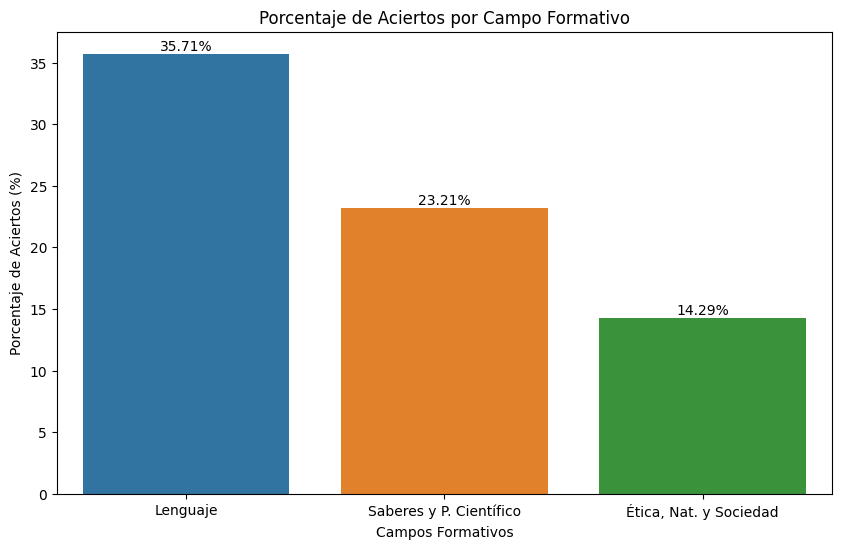

In [105]:
# Graficar los porcentajes de aciertos
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=['Lenguaje', 'Saberes y P. Científico', 'Ética, Nat. y Sociedad'],
                 y=[df_grafica_1['Porcentaje Aciertos Lenguaje'].mean(), df_grafica_1['Porcentaje Aciertos Saberes y P. Científico'].mean(), df_grafica_1['Porcentaje Aciertos Ética, Nat. y Sociedad'].mean()])
plt.title('Porcentaje de Aciertos por Campo Formativo')
plt.xlabel('Campos Formativos')
plt.ylabel('Porcentaje de Aciertos (%)')

# Agregar etiquetas de datos a las barras
for i in range(len(ax.patches)):
    plt.text(ax.patches[i].get_x() + ax.patches[i].get_width()/2., ax.patches[i].get_height(),
             f"{ax.patches[i].get_height():.2f}%", ha='center', va='bottom')

plt.show()

In [67]:
df_grafica_1.mean()

Porcentaje Aciertos Lenguaje                        37.5
Porcentaje Aciertos Saberes y P. Científico         25.0
Porcentaje Aciertos Ética, Nat. y Sociedad     17.857143
dtype: object

In [111]:
df_prueba = df_calificado[["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10"]]
df_prueba

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,1,1,1,0,0,0,1,0,0,0
1,0,1,1,1,0,1,0,0,0,0
2,1,0,1,NaN,0,0,0,0,0,0
3,0,1,0,0,0,1,0,NaN,1,0
4,0,0,0,1,0,0,0,0,0,0
5,0,0,NaN,0,1,0,1,0,0,0
6,1,0,0,1,0,1,1,0,0,0
7,0,0,1,0,NaN,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0
9,0,0,0,1,1,0,0,0,0,0


In [113]:
# Transponer el DataFrame
df_transposed = df_prueba.transpose()

# Contar el número de preguntas respondidas correctamente (1)
df_transposed['Total Correctas'] = df_transposed.eq(1).sum(axis=1)

# Contar el número de preguntas respondidas incorrectamente (0)
df_transposed['Total Incorrectas'] = df_transposed.eq(0).sum(axis=1)

# Calcular el total de preguntas respondidas (0 y 1)
df_transposed['Total Preguntas'] = df_transposed[['Total Correctas', 'Total Incorrectas']].sum(axis=1)

# Construir un nuevo DataFrame con los datos calculados
df_resultado = df_transposed.reset_index().rename(columns={'index': 'Pregunta'})

# Mostrar el DataFrame resultante
print(df_resultado)

  Pregunta  0  1    2    3  4    5  6    7  8  9   10 11   12 13  \
0       P1  1  0    1    0  0    0  1    0  0  0    1  0    0  0   
1       P2  1  1    0    1  0    0  0    0  0  0    1  0    0  0   
2       P3  1  1    1    0  0  NaN  0    1  0  0  NaN  1    0  1   
3       P4  0  1  NaN    0  1    0  1    0  0  1    1  1    0  0   
4       P5  0  0    0    0  0    1  0  NaN  0  1    1  0    0  0   
5       P6  0  1    0    1  0    0  1    0  1  0    0  0    0  0   
6       P7  1  0    0    0  0    1  1    0  0  0    0  0    0  0   
7       P8  0  0    0  NaN  0    0  0    0  0  0    1  1    0  1   
8       P9  0  0    0    1  0    0  0    0  0  0    0  1  NaN  0   
9      P10  0  0    0    0  0    0  0    0  0  0    0  1    1  0   

   Total Correctas  Total Incorrectas  Total Preguntas  
0                4                 10               14  
1                4                 10               14  
2                6                  6               12  
3                6     